In [2]:
import pandas as pd
from collections import Counter
from data_reader import GetDataAsPython

storage_directory = './storage/'
data = GetDataAsPython(f"{storage_directory}/data_and_models/data/data_autofix_tracking_repo_specific_final.json")
data_eslint = GetDataAsPython(f"{storage_directory}/data_and_models/data/data_autofix_tracking_eslint_final.json")
data+=data_eslint

In [3]:
repos = Counter([item.repo for item in data])
sorted_repos = sorted(repos.items(), key=lambda d: d[1], reverse=True)

In [4]:
print(sorted_repos[:10])

[('/data/all/data/qooxdoo/qooxdoo', 547), ('/data/all/data/ElevenGiants/eleven-gsjs', 254), ('/data/all/data/openlayers/openlayers', 236), ('/data/all/data/elastic/kibana', 231), ('/data/all/data/SAP/openui5', 227), ('/data/all/data/graalvm/graaljs', 220), ('/data/all/data/emberjs/ember.js', 218), ('/data/all/data/oroinc/platform', 216), ('/data/all/data/oskariorg/oskari-frontend', 201), ('/data/all/data/zloirock/core-js', 201)]


In [5]:
print(len(sorted_repos), sum([value for key,value in sorted_repos]))

23285 104804


In [6]:
import matplotlib.pyplot as plt

(array([14.,  9.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([134. , 175.3, 216.6, 257.9, 299.2, 340.5, 381.8, 423.1, 464.4,
        505.7, 547. ]),
 <BarContainer object of 10 artists>)

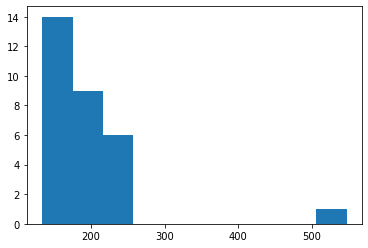

In [7]:
plt.hist([value for key,value in sorted_repos][:30])

In [8]:
print(sorted_repos[:30])

[('/data/all/data/qooxdoo/qooxdoo', 547), ('/data/all/data/ElevenGiants/eleven-gsjs', 254), ('/data/all/data/openlayers/openlayers', 236), ('/data/all/data/elastic/kibana', 231), ('/data/all/data/SAP/openui5', 227), ('/data/all/data/graalvm/graaljs', 220), ('/data/all/data/emberjs/ember.js', 218), ('/data/all/data/oroinc/platform', 216), ('/data/all/data/oskariorg/oskari-frontend', 201), ('/data/all/data/zloirock/core-js', 201), ('/data/all/data/cscheid/lux', 198), ('/data/all/data/handshake-org/hsd', 196), ('/data/all/data/Encapsule-Annex/onm', 194), ('/data/all/data/NPellet/visualizer', 192), ('/data/all/data/quailjs/quail', 182), ('/data/all/data/sequelize/sequelize', 180), ('/data/all/data/mrdoob/three.js', 173), ('/data/all/data/eclipse/orion.client', 170), ('/data/all/data/dcos/dcos-ui', 166), ('/data/all/data/binaryage/dirac', 165), ('/data/all/data/eclipse/scout.rt', 162), ('/data/all/data/LivelyKernel/LivelyKernel', 159), ('/data/all/data/appium/appium', 155), ('/data/all/data

In [9]:
target_big = sorted_repos[:30:3]
print(target_big, len(target_big), sum([value for key,value in target_big]))

[('/data/all/data/qooxdoo/qooxdoo', 547), ('/data/all/data/elastic/kibana', 231), ('/data/all/data/emberjs/ember.js', 218), ('/data/all/data/zloirock/core-js', 201), ('/data/all/data/Encapsule-Annex/onm', 194), ('/data/all/data/sequelize/sequelize', 180), ('/data/all/data/dcos/dcos-ui', 166), ('/data/all/data/LivelyKernel/LivelyKernel', 159), ('/data/all/data/svgdotjs/svg.js', 149), ('/data/all/data/foam-framework/foam', 135)] 10 2180


In [10]:
source_big = [item for item in sorted_repos[:30] if item not in target_big]
print(source_big[:3], len(source_big), sum([value for key,value in source_big]))

[('/data/all/data/ElevenGiants/eleven-gsjs', 254), ('/data/all/data/openlayers/openlayers', 236), ('/data/all/data/SAP/openui5', 227)] 20 3653


In [11]:
target_small = sorted_repos[30::7]
print(target_small[:2], len(target_small), sum([value for key,value in target_small]))

[('/data/all/data/dojo/dojox-oldmirror', 125), ('/data/all/data/infernojs/inferno', 116)] 3323 14197


In [12]:
source_small = [item for item in sorted_repos[30:] if item not in target_small]
print(source_small[:3], len(source_small), sum([value for key,value in source_small]))

[('/data/all/data/basisjs/basisjs', 124), ('/data/all/data/meteor/meteor', 123), ('/data/all/data/mozilla-b2g/gaia', 120)] 19932 84774


In [13]:
source_small_df = pd.DataFrame(source_small, columns=['repo', 'samples'])
source_small_df['category'] = 'source'
source_small_df['size'] = 'small'
source_big_df = pd.DataFrame(source_big, columns=['repo', 'samples'])
source_big_df['category'] = 'source'
source_big_df['size'] = 'big'
target_small_df = pd.DataFrame(target_small, columns=['repo', 'samples'])
target_small_df['category'] = 'target'
target_small_df['size'] = 'small'
target_big_df = pd.DataFrame(target_big, columns=['repo', 'samples'])
target_big_df['category'] = 'target'
target_big_df['size'] = 'big'

repos_df = pd.concat([source_small_df, source_big_df, target_small_df, target_big_df], ignore_index=True)
repos_df.head(1)

,repo,samples,category,size
0,/data/all/data/basisjs/basisjs,124,source,small


In [14]:
repos_df.to_csv('./repos_3.csv')